# Proyecto 1- Análisis de Péliculas y Series de TV en IMDB
### Integrantes:
- Roy Axel Torres Allccarima
- Angie Mina Ishuiza

**Crack the code**


##**Carga y limpieza de datos**


In [95]:
#Carga del CSV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('sample_data/imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [96]:
#Visualizacion de tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


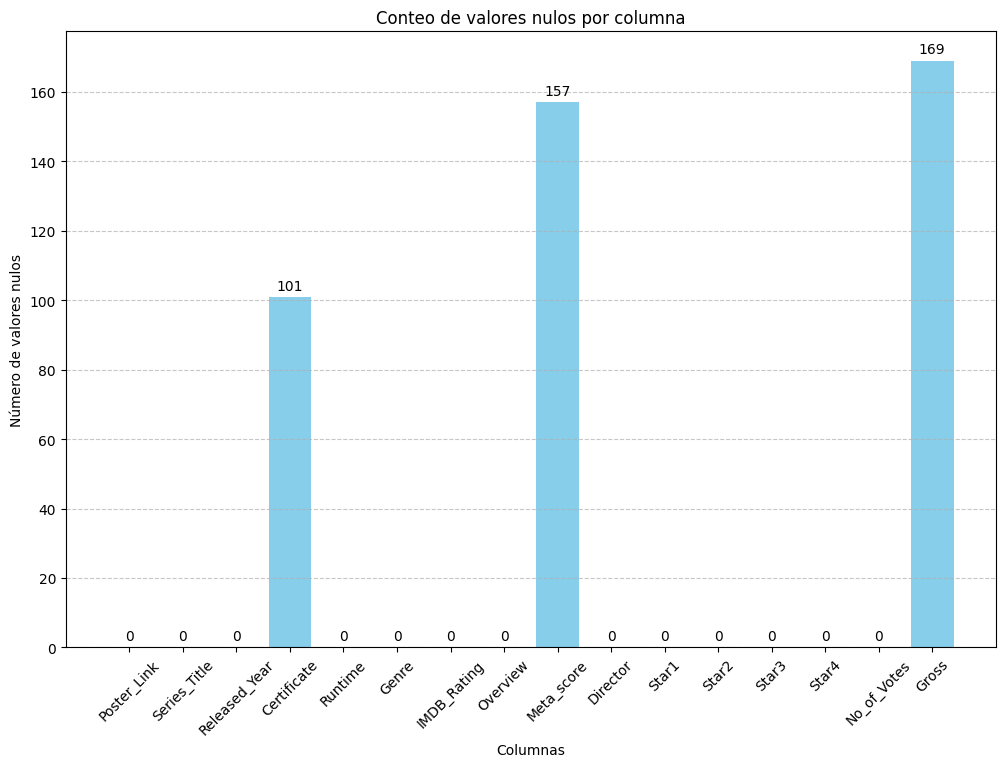

In [97]:
# Identificar valores faltantes por columna
# Contar los valores nulos por columna
null_counts = df.isnull().sum(axis=0)
print(null_counts)
# Graficar
plt.figure(figsize=(12, 8))
bars = plt.bar(null_counts.index, null_counts.values, color='skyblue')
# Añadir números de conteo dentro de las barras
plt.bar_label(bars, labels=[int(count) for count in null_counts.values], padding=3)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Columnas')
plt.ylabel('Número de valores nulos')
plt.title('Conteo de valores nulos por columna')
plt.xticks(rotation=45)
plt.show()

In [98]:
#Reemplazo de datos faltantes en Certificate como Unknow
df['Certificate'].fillna('Unknow', inplace=True)
df.isnull().sum(axis=0)

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [99]:
#Reemplazo de datos faltantes en Meta_score como mean
df['Meta_score'].fillna(df['Meta_score'].mean(), inplace=True)
print("Esto son los valores faltante \n",df.isnull().sum(axis=0))

Esto son los valores faltante 
 Poster_Link        0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [100]:
#Pasar el tipo de datos de Gross a float
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    float64
dtypes: float64(3), int64(1), object(12)
memory usage: 125.1+ KB


In [101]:
#Reemplazo de datos faltantes en Gross como mean
df['Gross'].fillna(df['Gross'].mean(), inplace=True)
df.isnull().sum(axis=0)

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          1000 non-null   float64
dtypes: float64(3), int64(1), object(12)
memory usage: 125.1+ KB


In [103]:
#Identificacion de valores duplicados
df.duplicated().sum()
print('Valores duplicados: ', df.duplicated().sum())

Valores duplicados:  0


##**Análisis explotario de datos(EDA)**

In [104]:
#Visualizacion de describes
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,1000.00000,1.000000e+03,1.000000e+03
mean,7.949300,77.97153,2.736929e+05,6.803475e+07
std,0.275491,11.36206,3.273727e+05,1.000371e+08
min,7.600000,28.00000,2.508800e+04,1.305000e+03
25%,7.700000,72.00000,5.552625e+04,5.012919e+06
50%,7.900000,77.97153,1.385485e+05,4.238945e+07
75%,8.100000,85.25000,3.741612e+05,6.803475e+07
max,9.300000,100.00000,2.343110e+06,9.366622e+08


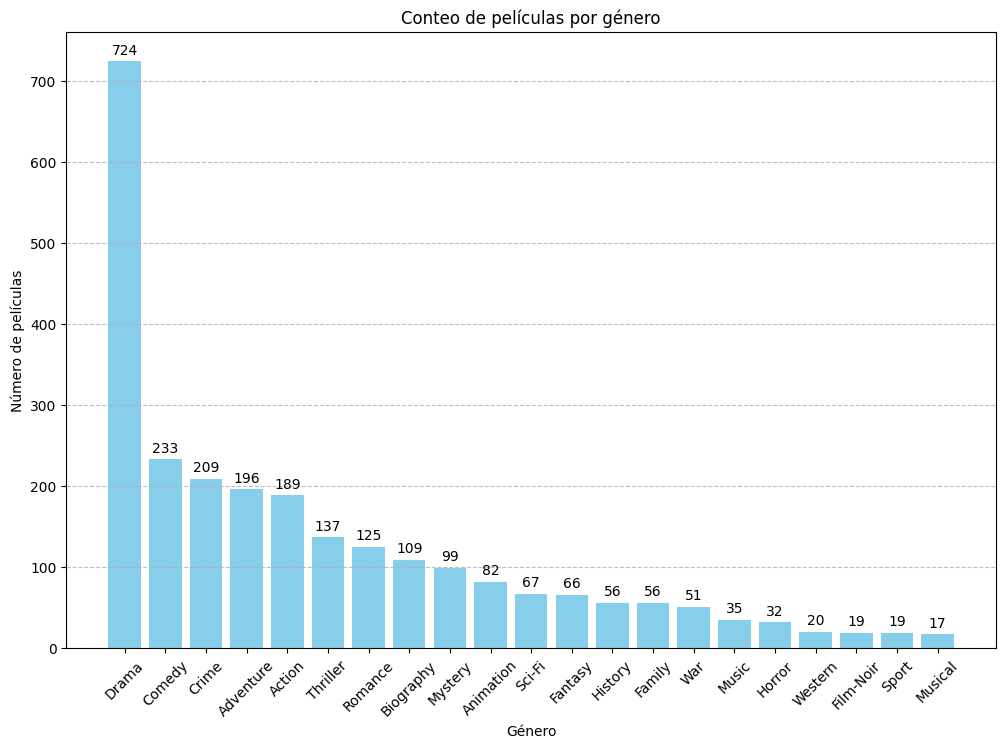

In [105]:
# Dividir los generos
df['Genre'] = df['Genre'].str.split(', ')
# Expandir la columna de géneros para contar cada género individualmente
genres_expanded = df.explode('Genre')
genre_counts = genres_expanded['Genre'].value_counts()
# Graficar el conteo de películas por género usando matplotlib
plt.figure(figsize=(12, 8))
bars = plt.bar(genre_counts.index, genre_counts.values, color='skyblue')
# Añadir números de conteo
plt.bar_label(bars, labels=[f'{int(count)}' for count in genre_counts.values], padding=3)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.xlabel('Género')
plt.ylabel('Número de películas')
plt.title('Conteo de películas por género')
plt.xticks(rotation=45)
plt.show()


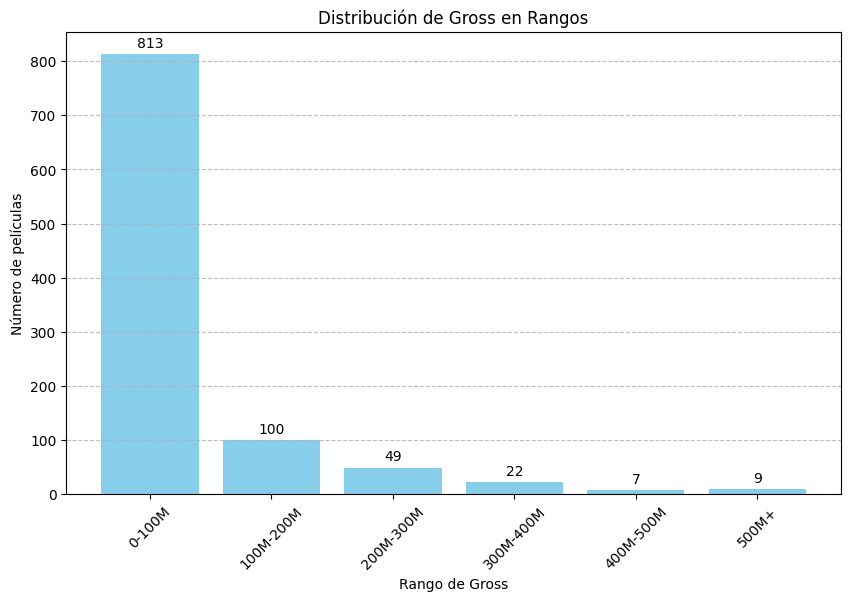

In [106]:
# Definicion los rangos
bins = [0, 100000000, 200000000, 300000000, 400000000, 500000000, float('inf')]
labels = ['0-100M', '100M-200M', '200M-300M', '300M-400M', '400M-500M', '500M+']
# Conteo de la cantidad de películas
gross_ranges = pd.cut(df['Gross'], bins=bins, labels=labels)
range_counts = gross_ranges.value_counts().sort_index()
# Gráfica
plt.figure(figsize=(10, 6))
bars = plt.bar(range_counts.index, range_counts.values, color='skyblue')
# Añadir etiquetas de conteo dentro de las barras
plt.bar_label(bars, labels=[f'{int(count)}' for count in range_counts.values], padding=3)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.xlabel('Rango de Gross')
plt.ylabel('Número de películas')
plt.title('Distribución de Gross en Rangos')
plt.xticks(rotation=45)
plt.show()

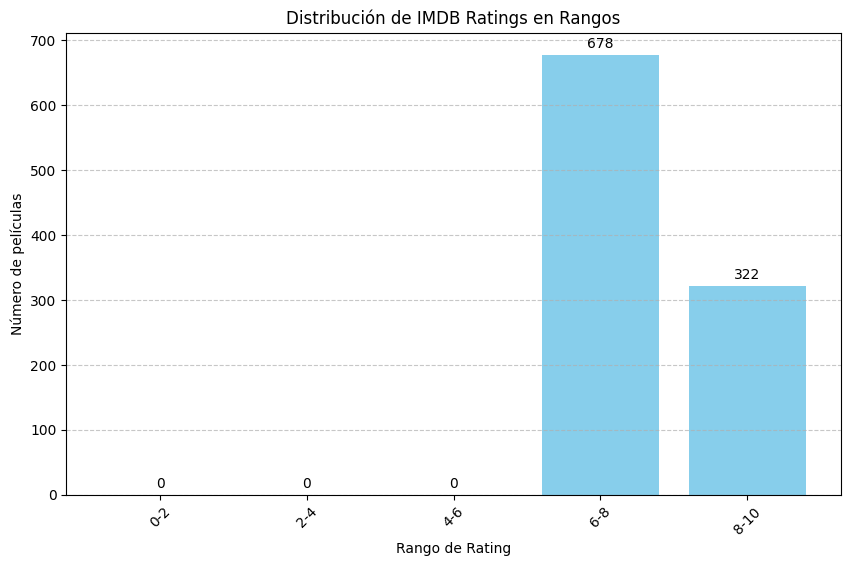

In [107]:
bins = [0, 2, 4, 6, 8, 10]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10']
rating_ranges = pd.cut(df['IMDB_Rating'], bins=bins, labels=labels)
rating_counts = rating_ranges.value_counts().sort_index()
# Graficar
plt.figure(figsize=(10, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color='skyblue')
# Añadir números de conteo dentro de las barras
plt.bar_label(bars, labels=[f'{int(count)}' for count in rating_counts.values], padding=3)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Rango de Rating')
plt.ylabel('Número de películas')
plt.title('Distribución de IMDB Ratings en Rangos')
plt.xticks(rotation=45)
plt.show()

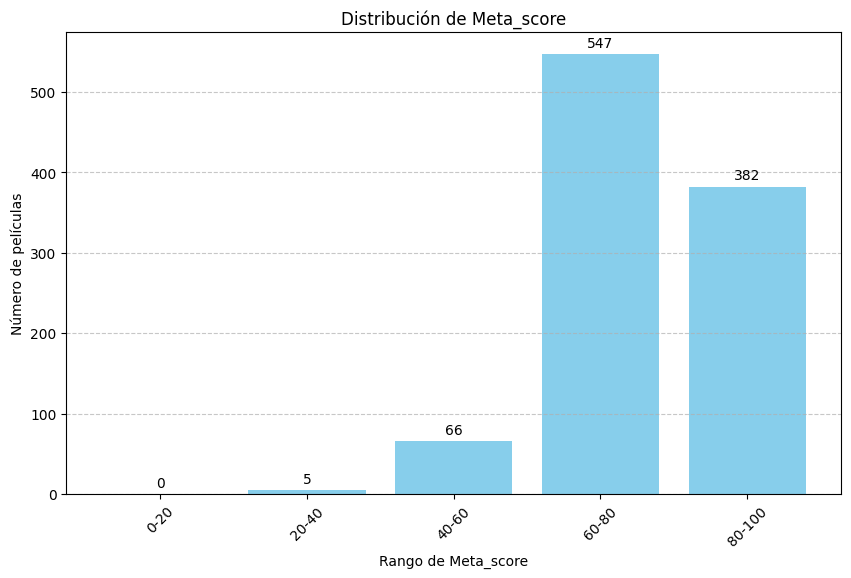

In [108]:
#Score
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
score_ranges = pd.cut(df['Meta_score'], bins=bins, labels=labels)
score_counts = score_ranges.value_counts().sort_index()
plt.figure(figsize=(10, 6))
bars = plt.bar(score_counts.index, score_counts.values, color='skyblue')
plt.bar_label(bars, labels=[f'{int(count)}' for count in score_counts.values], padding=3)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Rango de Meta_score')
plt.ylabel('Número de películas')
plt.title('Distribución de Meta_score')
plt.xticks(rotation=45)

plt.show()

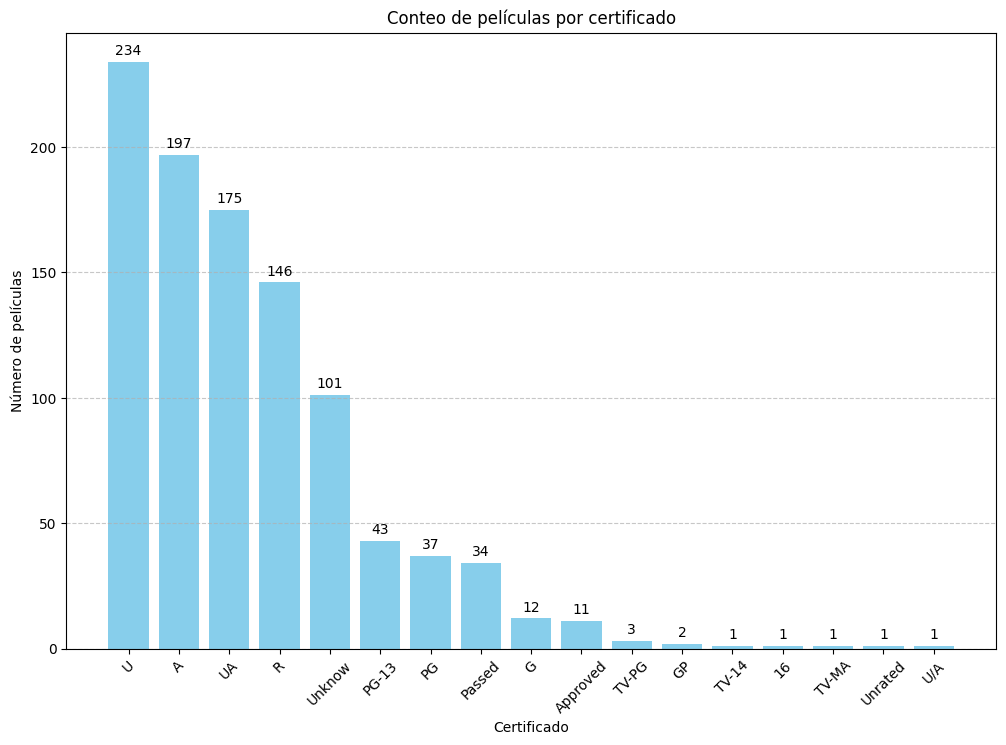

In [109]:
# Contar el número de películas por certificado
certificate_counts = df['Certificate'].value_counts()

plt.figure(figsize=(12, 8))
bars = plt.bar(certificate_counts.index, certificate_counts.values, color='skyblue')
plt.bar_label(bars, labels=[f'{int(height)}' for height in certificate_counts.values], padding=3)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xlabel('Certificado')
plt.ylabel('Número de películas')
plt.title('Conteo de películas por certificado')
plt.xticks(rotation=45)

plt.show()

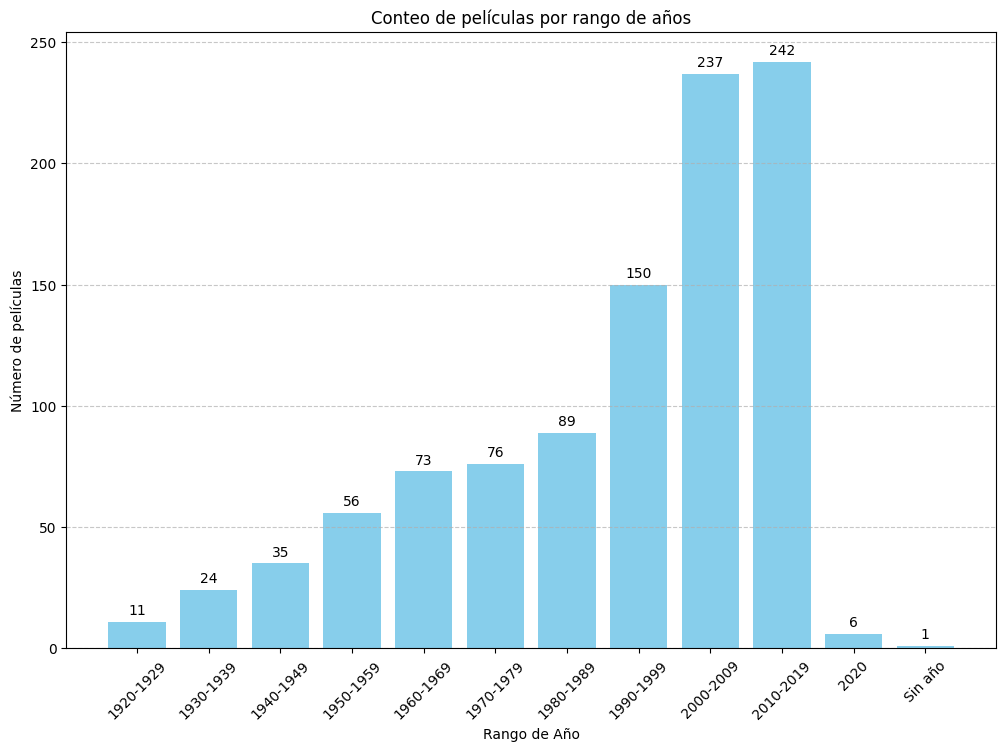

In [110]:
# Convertir la columna 'Released_Year' a formato numérico, manejando valores no numéricos
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Definir los rangos de años
bins = list(range(1920, 2031, 10)) + [float('inf')]  # Añadir un bin extra para los valores sin año
labels = [f'{start}-{start + 9}' for start in range(1920, 2020, 10)] + ['2020', 'Sin año']

# Crear una columna para los rangos de años
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df['Year_Range'] = pd.cut(df['Released_Year'], bins=bins, labels=labels, right=False)
df['Year_Range'].fillna('Sin año', inplace=True)

# Contar la cantidad de películas en cada rango de años
year_range_counts = df['Year_Range'].value_counts().reindex(labels).fillna(0)

# Graficar
plt.figure(figsize=(12, 8))
bars = plt.bar(year_range_counts.index, year_range_counts.values, color='skyblue')

# Añadir números de conteo dentro de las barras usando plt.bar_label
plt.bar_label(bars, labels=[int(count) for count in year_range_counts.values], padding=3)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xlabel('Rango de Año')
plt.ylabel('Número de películas')
plt.title('Conteo de películas por rango de años')
plt.xticks(rotation=45)
plt.show()

### **1. Análisis de la recaudación bruta de una película vs. directores.**

*   ¿Qué directores tienden a generar mayores ingresos en taquilla?


                            sum
Director                       
Steven Spielberg   2.478133e+09
Anthony Russo      2.205039e+09
Christopher Nolan  1.937454e+09
James Cameron      1.748237e+09
Peter Jackson      1.597312e+09
J.J. Abrams        1.423171e+09
Brad Bird          1.099628e+09
Robert Zemeckis    1.049446e+09
Pete Docter        1.007417e+09
David Yates        9.789537e+08


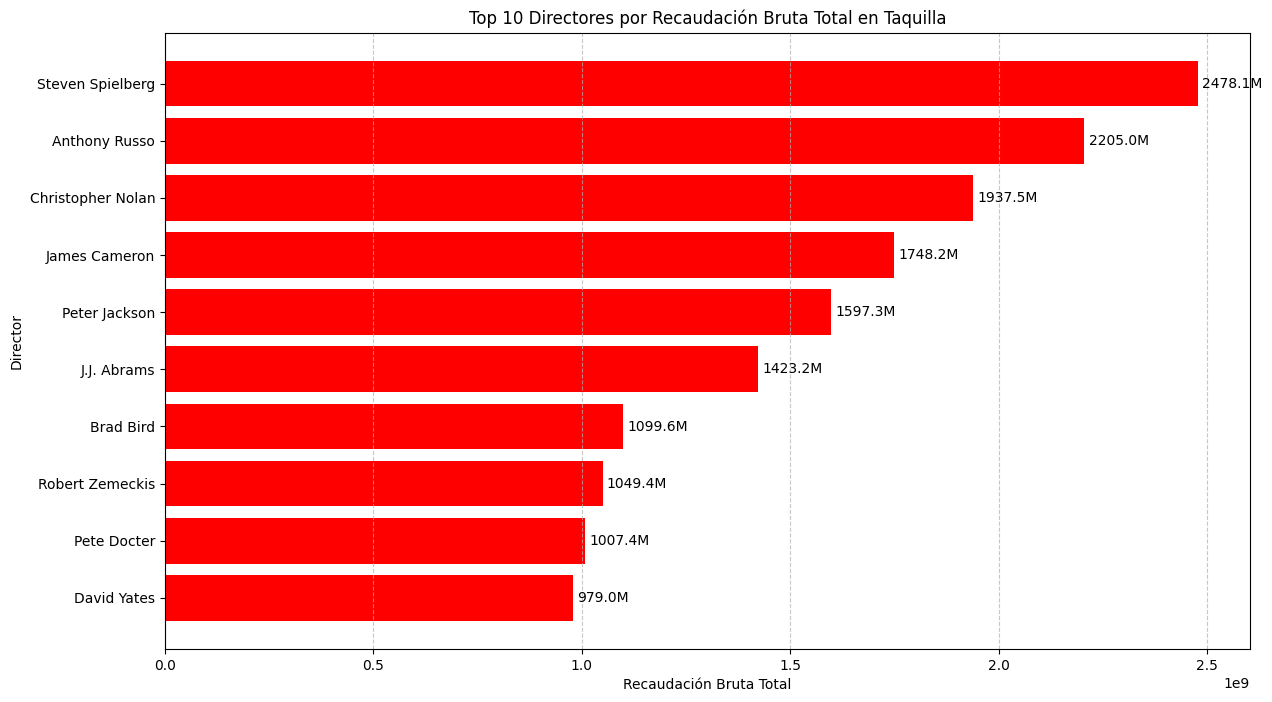

In [113]:
# Agrupar por director y calcular la recaudación bruta total y media
director_gross = df.groupby('Director')['Gross'].agg(['sum']).sort_values(by='sum', ascending=False)

# Mostrar los 10 directores con mayor recaudación bruta total
print(director_gross.head(10))

# Graficar
plt.figure(figsize=(14, 8))
top_directors = director_gross.head(10).sort_values(by='sum', ascending=True)
bars = plt.barh(top_directors.index, top_directors['sum'], color='red')
plt.xlabel('Recaudación Bruta Total')
plt.ylabel('Director')
plt.title('Top 10 Directores por Recaudación Bruta Total en Taquilla')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir etiquetas a las barras
plt.bar_label(bars, labels=[f'{x/1e6:.1f}M' for x in top_directors['sum']], padding=3)
plt.show()

### **2. Análisis de la recaudación bruta de una película vs. diferente actores.**

*   ¿Qué actores están asociados con películas que generan mayores ingresos?

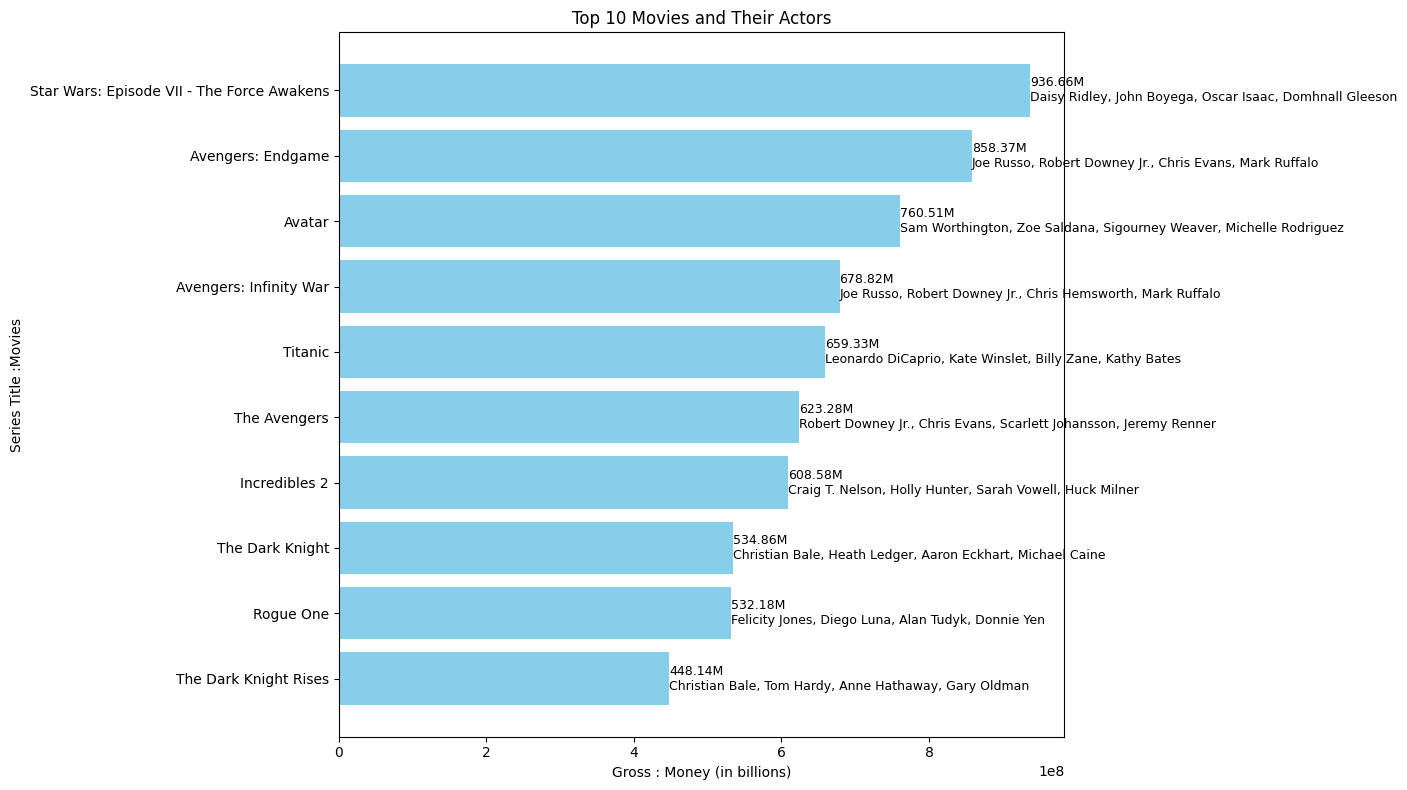

In [ ]:
#Orden del top 10 de Gross, extrayendo Series_Title, Star1, Star2, Star3, Star4
df_sorted = df.sort_values(by='Gross', ascending=False)
top_grossing_movies = df_sorted.head(10)
actors_top_grossing = top_grossing_movies[['Series_Title', 'Gross', 'Star1', 'Star2', 'Star3', 'Star4']]


# Graficar usando Matplotlib
plt.figure(figsize=(14, 8))
bars = plt.barh(actors_top_grossing['Series_Title'], actors_top_grossing['Gross'], color='skyblue')

# Nombre de los actores en cada barra de la pelicula
for i, (gross, star1, star2, star3, star4) in enumerate(zip(actors_top_grossing['Gross'], actors_top_grossing['Star1'], actors_top_grossing['Star2'], actors_top_grossing['Star3'], actors_top_grossing['Star4'])):
    plt.text(gross, i,  f'{gross/1e6:.2f}M\n{star1}, {star2}, {star3}, {star4}', va='center', ha='left', fontsize=9)


# Visualización
plt.xlabel('Gross : Money (in billions)')
plt.ylabel('Series Title :Movies')
plt.title('Top 10 Movies and Their Actors')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



### **3. Análisis del número de votos de una pelicula vs directores.**

*   ¿Qué directores tienden a recibir más votos en IMDB?

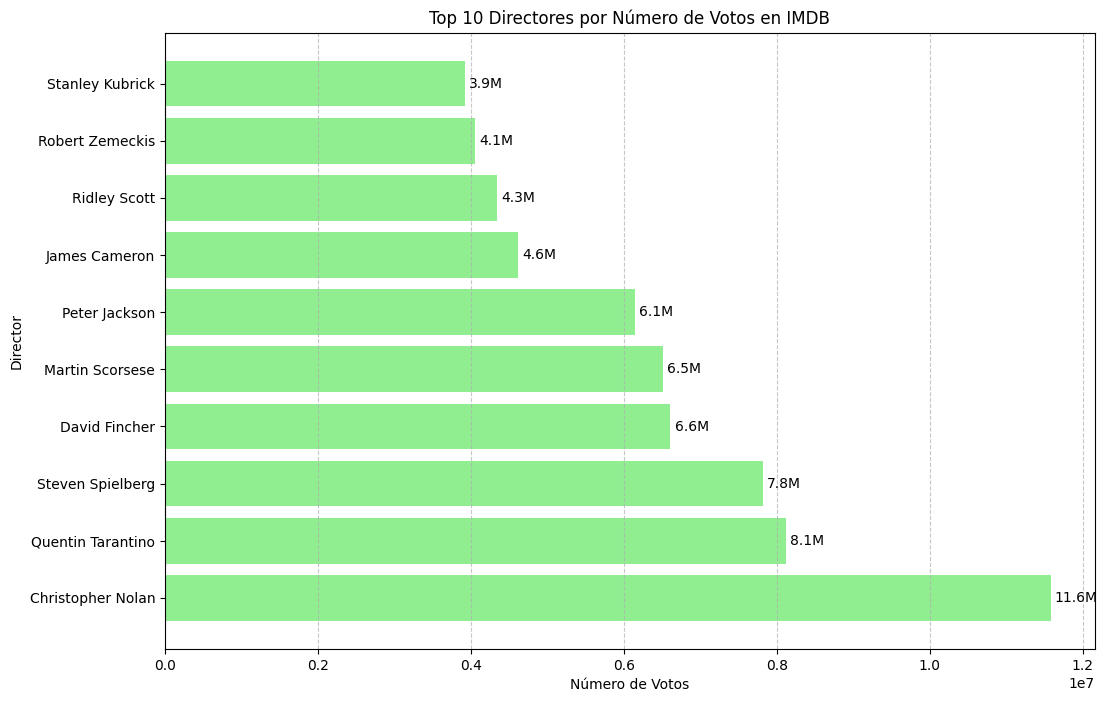

In [ ]:
# Agrupar por director y sumar los votos
director_votes = df.groupby('Director')['No_of_Votes'].sum().reset_index()

# Ordenar los directores por número total de votos seleccionar los top 10
top_directors_votes = director_votes.sort_values(by='No_of_Votes', ascending=False).head(10)

# Graficar
plt.figure(figsize=(12, 8))
bars = plt.barh(top_directors_votes['Director'], top_directors_votes['No_of_Votes'], color='lightgreen')
plt.xlabel('Número de Votos')
plt.ylabel('Director')
plt.title('Top 10 Directores por Número de Votos en IMDB')

# Añadir números de votos
plt.bar_label(bars, labels=[f'{x/1e6:.1f}M' for x in top_directors_votes['No_of_Votes']], padding=3)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

### **4. Análisis del número de votos de una pelicula vs diferente actores.**

*   ¿Qué actores están asociados con películas que reciben más votos?

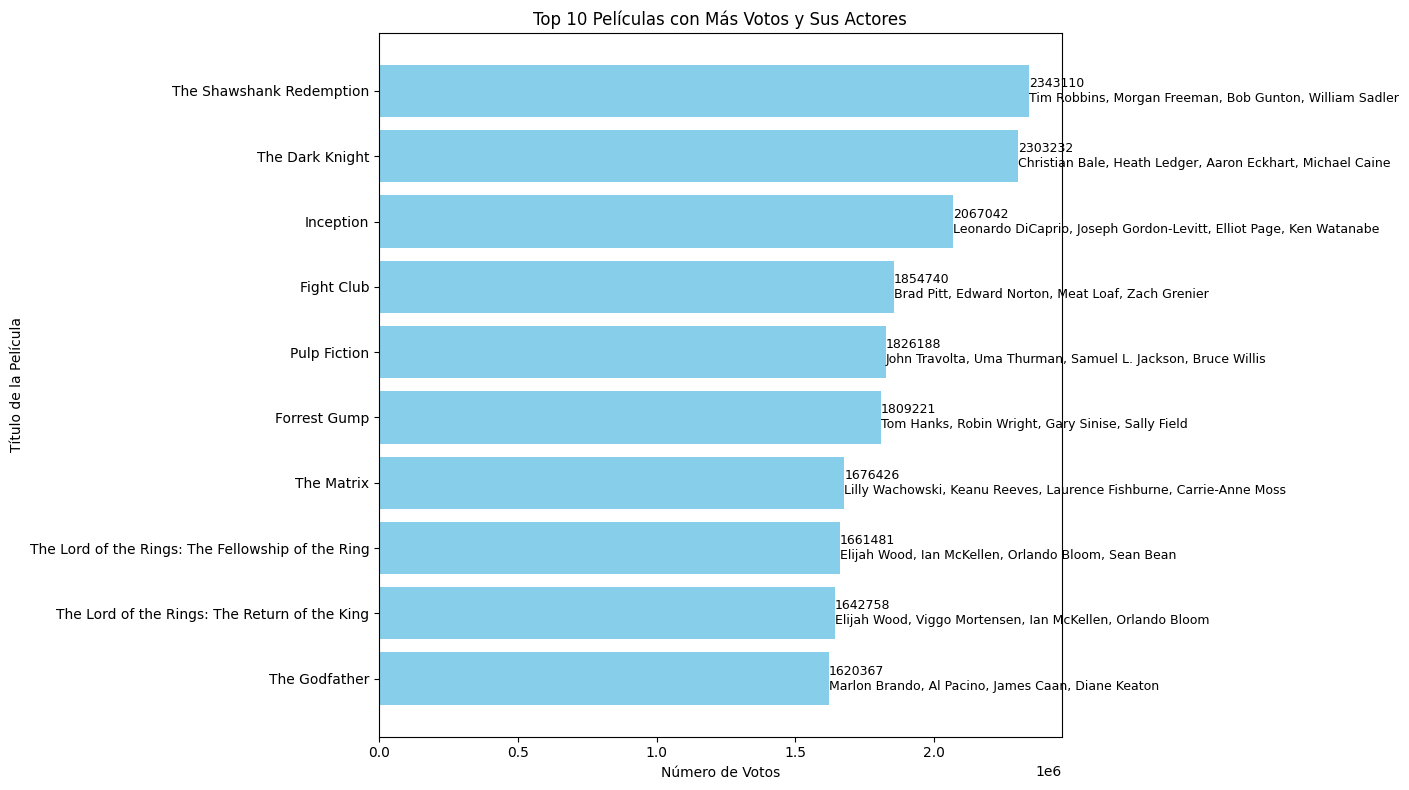

In [115]:
# Ordenar por número de votos en orden descendente
df_sorted = df.sort_values(by='No_of_Votes', ascending=False)

# Obtener las 10 películas con más votos
top_voted_movies = df_sorted.head(10)

# Seleccionar las columnas relevantes
actors_top_voted = top_voted_movies[['Series_Title', 'No_of_Votes', 'Star1', 'Star2', 'Star3', 'Star4']]

# Graficar usando Matplotlib
plt.figure(figsize=(14, 8))
bars = plt.barh(actors_top_voted['Series_Title'], actors_top_voted['No_of_Votes'], color='skyblue')

# Nombre de los actores en cada barra de la película
for i, (votes, star1, star2, star3, star4) in enumerate(zip(actors_top_voted['No_of_Votes'], actors_top_voted['Star1'], actors_top_voted['Star2'], actors_top_voted['Star3'], actors_top_voted['Star4'])):
    plt.text(votes, i, f'{votes}\n{star1}, {star2}, {star3}, {star4}', va='center', ha='left', fontsize=9)

# Visualización
plt.xlabel('Número de Votos')
plt.ylabel('Título de la Película')
plt.title('Top 10 Películas con Más Votos y Sus Actores')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

##**Modelado matemático**




### **Preparación de datos**



Selecciona las columnas relevantes.

In [ ]:
df = pd.read_csv('sample_data/imdb_top_1000.csv')
df = df[['No_of_Votes', 'Meta_score', 'Gross', 'IMDB_Rating']].copy()

Verifica los tipos de datos

In [ ]:
df.dtypes

No_of_Votes      int64
Meta_score     float64
Gross           object
IMDB_Rating    float64
dtype: object

Verifica valores vacíos

In [ ]:
df.isnull().sum()

No_of_Votes      0
Meta_score     157
Gross          169
IMDB_Rating      0
dtype: int64

Se reemplaza con valores vacíos con la media en Meta_score


In [ ]:
df['Meta_score'].fillna(df['Meta_score'].mean(), inplace=True)

Se convierte el tipo de valor a float y valores vacíos reemplazados por la media para Gross

In [ ]:
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)
df['Gross'].fillna(df['Gross'].mean(), inplace=True)

Extrae las características y la variable objetivo.




In [ ]:
X = df[['No_of_Votes', 'Meta_score', 'Gross']].values
Y = df['IMDB_Rating'].values

Normaliza las características y la variable objetivo.

In [ ]:
# Características
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Variable objetivo
Y = (Y - np.mean(Y)) / np.std(Y)

Inicializa parámetros

In [ ]:
W = np.zeros(X.shape[1])
b = 0

### **Función Costo**


Implementamos la función de costo (MSE).

$ J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2 $

In [ ]:
def compute_cost(X, Y, W, b):
    m = len(Y)
    predict = X.dot(W) + b
    cost = np.sum((predict - Y) ** 2) / (2 * m)
    return cost
print(compute_cost(X, Y, W, b))

0.49999999999999983


### **Función de descenso por gradiente**

Minimiza la función de costo actualizando iterativamente los parámetros utilizando la regla de actualización del descenso de gradiente. Es un método iterativo utilizado para encontrar el mínimo de una función ajustando los parámetros en la dirección del descenso más pronunciado del gradiente, con el objetivo de minimizar el costo o error asociado con las predicciones del modelo.

In [ ]:
def gradient_descent(X, Y, W, b, learning_rate, iterations):
    m = len(Y)
    costs = [] # Lista para almacenar los costos durante el entrenamiento
    for i in range(iterations):
        # Calcular las predicciones (hipótesis)
        Y_pred = X.dot(W) + b

        # Calcular las derivadas
        dW = -1/m * X.T.dot(Y - Y_pred)
        db = -1/m * np.sum(Y - Y_pred)

        # Actualizar los parámetros
        W = W - learning_rate * dW
        b = b - learning_rate * db

        # Calcular el costo
        cost = compute_cost(X, Y, W, b)
        costs.append(cost)

        # Imprimir el costo cada 100 iteraciones
        if i % 100 == 0:
            print(f"Iteración {i}: Costo {cost}")

    return W, b, costs


### **Entrenamiento del Modelo**

Verificar si hay valores nulos o infinitos en X o Y

In [ ]:
print("Valores nulos en X:", np.isnan(X).sum())
print("Valores infinitos en X:", np.isinf(X).sum())
print("Valores nulos en Y:", np.isnan(Y).sum())
print("Valores infinitos en Y:", np.isinf(Y).sum())

Valores nulos en X: 0
Valores infinitos en X: 0
Valores nulos en Y: 0
Valores infinitos en Y: 0


Establece la tasa de aprendizaje y el número de iteraciones.

In [ ]:
learning_rate = 0.001
iterations = 1000

Ejecuta el descenso por gradiente para optimizar los parámetros.

In [ ]:
W, b, costs= gradient_descent(X, Y, W, b, learning_rate, iterations)
print(f"W: {W}, b: {b}")

Iteración 0: Costo 0.49968263069408647
Iteración 100: Costo 0.4712872458263152
Iteración 200: Costo 0.44847235727449936
Iteración 300: Costo 0.4299799213715112
Iteración 400: Costo 0.4148570229205838
Iteración 500: Costo 0.40237901046933994
Iteración 600: Costo 0.39199240382223227
Iteración 700: Costo 0.3832724234167184
Iteración 800: Costo 0.37589134361110343
Iteración 900: Costo 0.36959486732595115
W: [ 0.31267259  0.16293375 -0.01247204], b: 1.9083472579950544e-15


### **Función para calcular el RMSE**

In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

# Calcular las predicciones
y_pred = np.dot(X, W) + b

# Calcular el RMSE
error = rmse(Y, y_pred)
print(f"RMSE del modelo: {error}")

RMSE del modelo: 0.8535042035970533


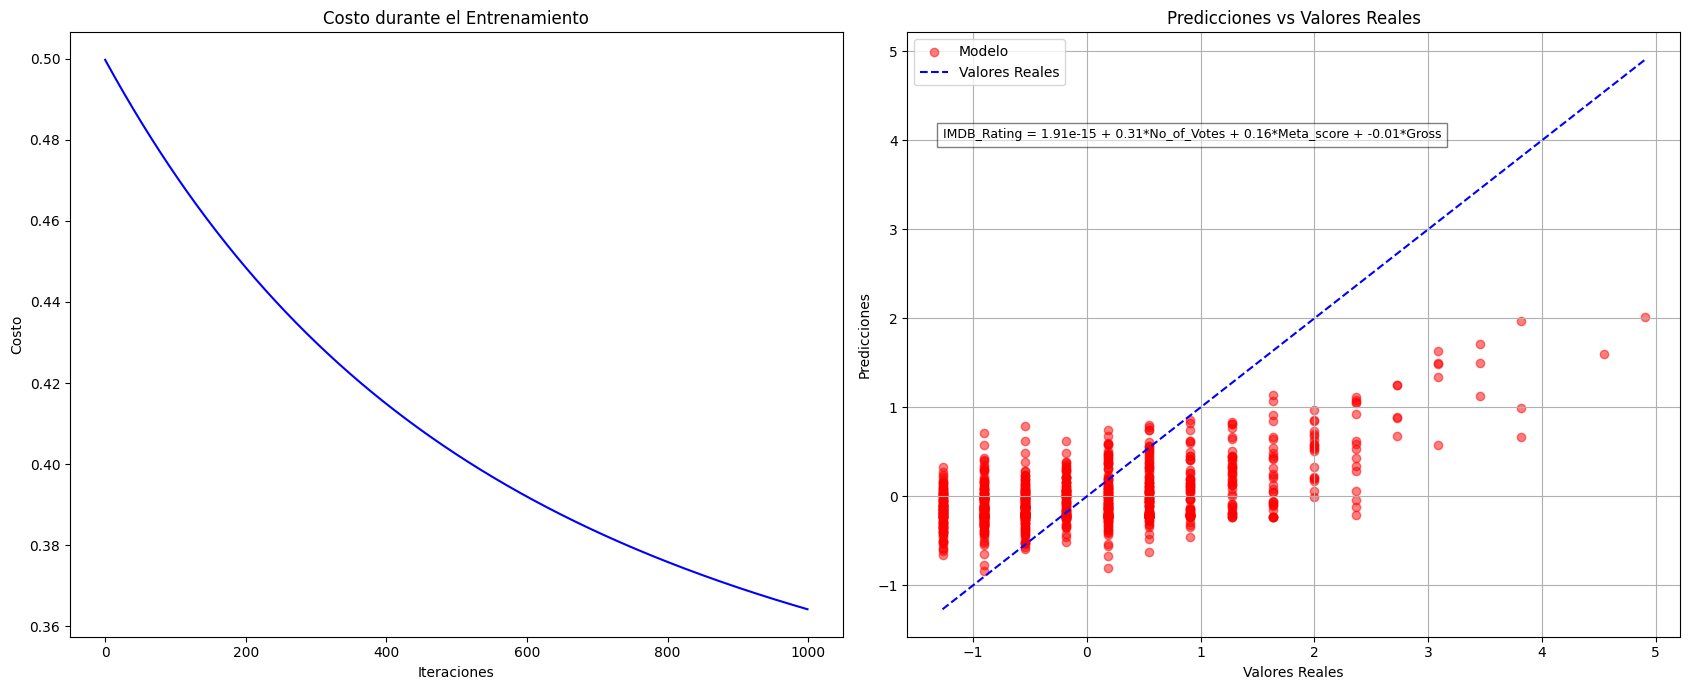

In [ ]:
# Graficar el costo durante el entrenamiento
plt.figure(figsize=(17, 7))

plt.subplot(1, 2, 1)
plt.plot(range(iterations), costs, color='blue')
plt.title('Costo durante el Entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
# Graficar Predicciones vs Valores Reales
plt.subplot(1, 2, 2)
plt.scatter(Y, y_pred, color='red', alpha=0.5)
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], color='blue', linestyle='--')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
# Crear la fórmula del modelo en formato de texto
formula = f"IMDB_Rating = {b:.2e} + {W[0]:.2f}*No_of_Votes + {W[1]:.2f}*Meta_score + {W[2]:.2f}*Gross"
# Agregar la fórmula del modelo al gráfico
plt.text(min(Y), max(y_pred)*2, formula, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
plt.legend(['Modelo', 'Valores Reales'], loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()